#hand Written Digital Predction- classification Anaylis 

# the digits dataset consist of 8*8 pixcel images of digit .the images attribute of the dataset stores 8*8 arrays of graycycles values for each image we will usethese arrays to visuallize the first 4 images. the target attribute of the dataset stores the digit each  image represent.

# import Library

In [6]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# inport data

In [7]:
from sklearn.datasets import load_digits

In [8]:
df =load_digits()

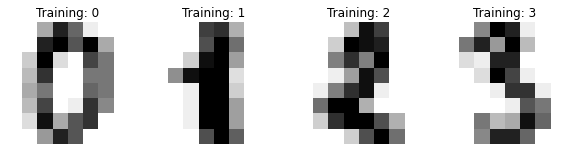

In [10]:
_, axes =plt.subplots(nrows=1, ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Data PreProcessing

In [ ]:
df.image.shape

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [14]:
n_samples=len(df.images)
data =df.images.reshape(n_samples,-1)

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

# Scalling images

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [ ]:
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

16.0

In [22]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# Train Test Split Data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(data,df.target,test_size=0.3)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest model 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

# Predict Test Data

In [32]:
y_pred = rf.predict(x_test)
y_pred

array([6, 6, 5, 4, 9, 6, 6, 4, 4, 3, 8, 8, 1, 0, 8, 5, 0, 1, 3, 5, 6, 8,
       5, 2, 0, 5, 6, 0, 5, 6, 7, 2, 1, 1, 6, 7, 0, 5, 7, 5, 7, 5, 3, 0,
       1, 8, 3, 4, 7, 5, 5, 2, 4, 2, 5, 4, 9, 4, 9, 7, 2, 6, 7, 7, 3, 6,
       0, 5, 7, 7, 3, 4, 3, 8, 3, 5, 9, 3, 4, 9, 0, 0, 8, 9, 3, 3, 1, 3,
       0, 7, 9, 9, 9, 2, 8, 2, 5, 9, 1, 4, 0, 5, 2, 7, 4, 8, 2, 2, 0, 2,
       7, 6, 7, 0, 1, 0, 3, 1, 1, 5, 8, 2, 5, 1, 0, 3, 6, 1, 8, 2, 2, 9,
       1, 5, 2, 3, 3, 4, 5, 6, 7, 8, 0, 0, 6, 7, 6, 3, 2, 4, 4, 0, 0, 2,
       5, 6, 4, 7, 0, 0, 9, 7, 8, 2, 1, 5, 6, 8, 8, 7, 6, 9, 5, 6, 3, 8,
       3, 1, 9, 1, 0, 9, 6, 1, 9, 8, 0, 0, 2, 4, 5, 8, 4, 9, 3, 3, 4, 5,
       7, 2, 0, 5, 1, 5, 7, 3, 3, 2, 0, 9, 0, 4, 6, 5, 9, 3, 4, 4, 3, 9,
       6, 1, 2, 8, 9, 1, 2, 1, 9, 3, 3, 3, 6, 6, 6, 6, 1, 8, 0, 9, 3, 5,
       6, 7, 1, 5, 2, 5, 0, 6, 4, 7, 8, 5, 9, 8, 8, 4, 2, 2, 4, 0, 5, 5,
       7, 4, 4, 8, 0, 7, 0, 5, 7, 9, 6, 9, 2, 5, 3, 0, 1, 0, 1, 9, 7, 1,
       1, 5, 0, 3, 9, 9, 1, 3, 9, 9, 7, 4, 3, 6, 3,

# Model Accuracy


In [36]:
from sklearn.metrics import confusion_matrix, classification_report


In [37]:
confusion_matrix(y_test,y_pred)

array([[56,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  1,  2,  0,  0,  1,  1,  0, 49,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  2, 55]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.98      1.00      0.99        50
           2       0.96      1.00      0.98        52
           3       0.96      1.00      0.98        54
           4       0.98      1.00      0.99        46
           5       0.97      0.98      0.97        59
           6       0.96      1.00      0.98        55
           7       1.00      1.00      1.00        53
           8       0.96      0.91      0.93        54
           9       1.00      0.92      0.96        60

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

